In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [10]:
data=pd.read_csv("C:\\Users\\SHREENATH S HEBBAR\\Documents\\python\\Machine Learning\\Projects\\titanic_data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

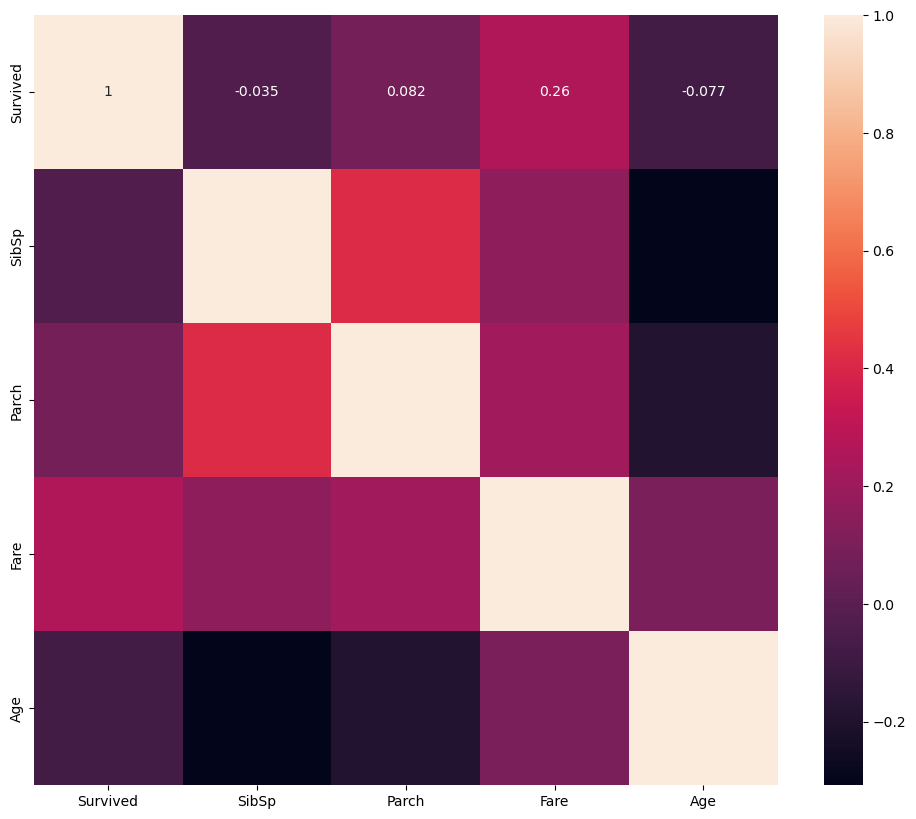

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(data[['Survived','SibSp','Parch','Fare','Age']].corr(),annot=True)

In [24]:
data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [27]:
data["SibSp"]

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

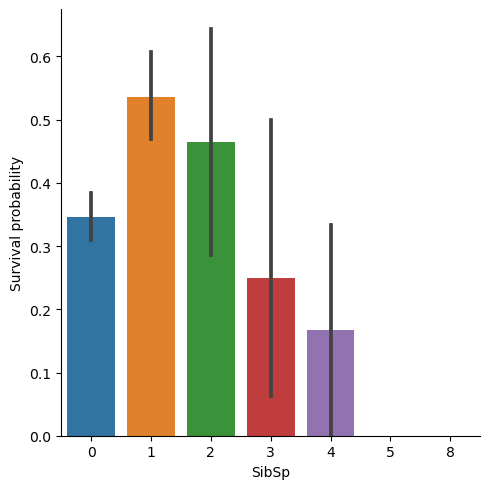

In [29]:
sns.catplot(x="SibSp",y='Survived',data=data,kind='bar').set_ylabels('Survival probability')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flex

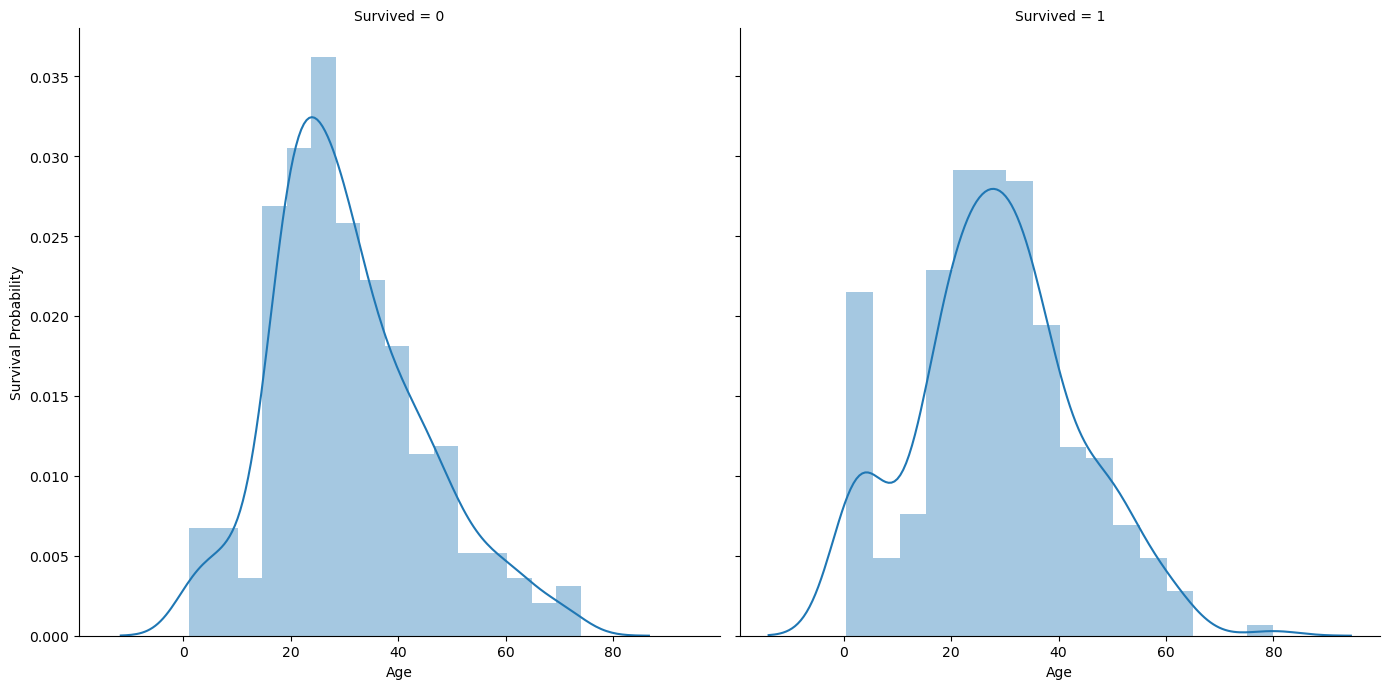

In [33]:
age1=sns.FacetGrid(data=data,col="Survived",height=7)
age1.map(sns.distplot,"Age").set_ylabels('Survival Probability')

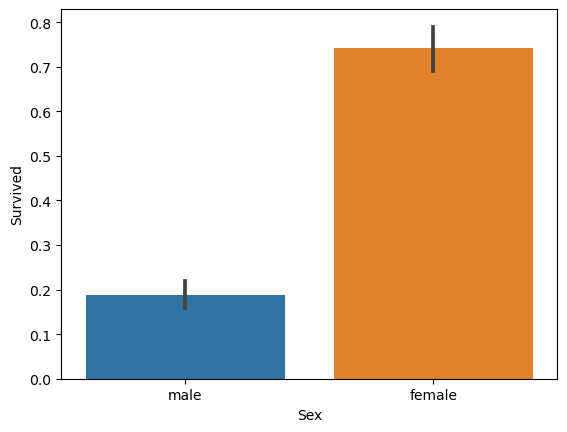

In [34]:
age2=sns.barplot(data=data,x="Sex",y='Survived')

In [38]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


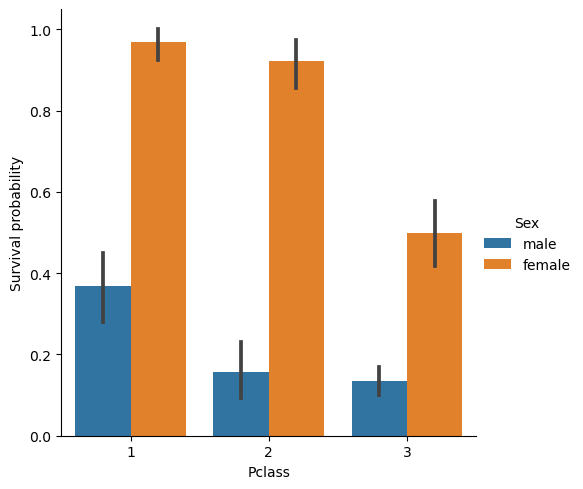

In [40]:
sns.catplot(x="Pclass",y='Survived',data=data,hue='Sex',kind='bar').set_ylabels('Survival probability')

In [41]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [42]:
data["Embarked"]=data["Embarked"].fillna('S')

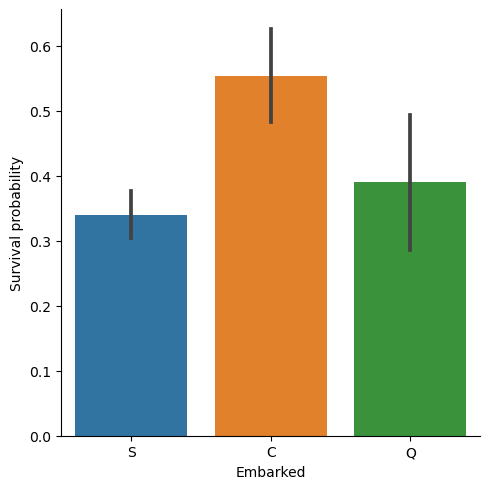

In [43]:
sns.catplot(x="Embarked",y='Survived',data=data,kind='bar').set_ylabels('Survival probability')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

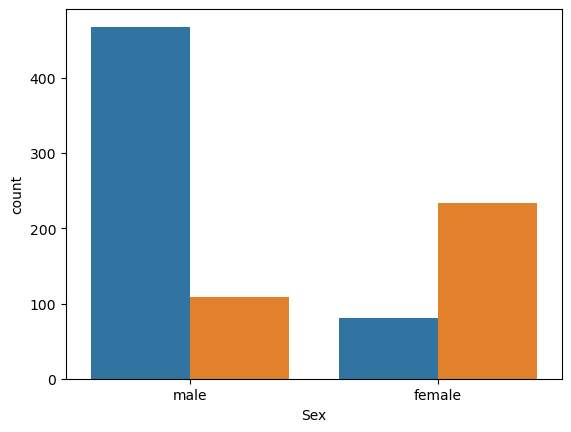

In [48]:


sns.countplot(x=data["Sex"], hue=data['Survived'])


<Axes: xlabel='Sex', ylabel='count'>

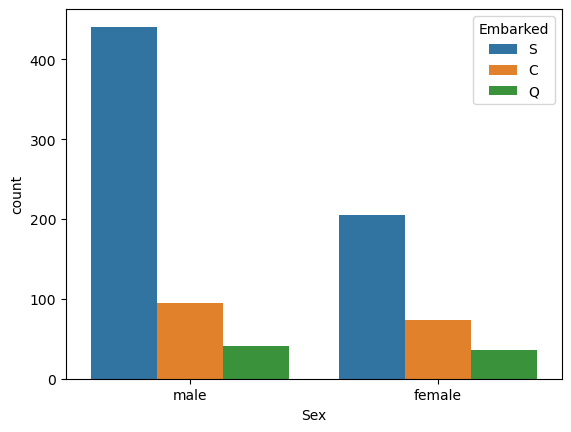

In [49]:
sns.countplot(x=data["Sex"], hue=data['Embarked'])

In [50]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
mean=data['Age'].mean()
std=data['Age'].std()


In [54]:
print(mean,std)

29.69911764705882 14.526497332334044


In [55]:
ran=np.random.randint(mean-std,mean+std,177)

In [56]:
ran

array([25, 31, 41, 30, 29, 27, 16, 23, 18, 30, 20, 39, 27, 24, 39, 21, 17,
       20, 28, 16, 15, 40, 32, 43, 26, 15, 40, 15, 37, 39, 28, 15, 40, 34,
       24, 40, 20, 28, 41, 29, 16, 29, 31, 38, 36, 43, 17, 19, 16, 16, 16,
       39, 18, 35, 33, 40, 24, 31, 26, 28, 22, 42, 30, 16, 42, 29, 30, 31,
       20, 37, 22, 19, 31, 38, 20, 36, 32, 24, 25, 42, 34, 23, 20, 21, 24,
       40, 30, 32, 37, 15, 25, 15, 43, 31, 17, 31, 19, 41, 41, 36, 31, 40,
       38, 42, 42, 27, 18, 17, 24, 23, 39, 38, 21, 35, 29, 35, 40, 30, 31,
       24, 16, 23, 18, 40, 40, 40, 32, 31, 32, 23, 38, 20, 38, 35, 18, 27,
       37, 35, 37, 29, 24, 24, 43, 15, 20, 40, 40, 21, 19, 29, 18, 35, 27,
       30, 20, 37, 30, 28, 22, 34, 29, 35, 36, 19, 26, 41, 15, 31, 32, 43,
       26, 30, 23, 22, 42, 42, 37])

In [58]:
a=data['Age'].copy()
a[np.isnan(a)]=ran

In [59]:
data['Age']=a

In [60]:
data['Age'].isnull().sum()

0

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
col1=['PassengerId','Cabin','Ticket','Name']
data.drop(col1,axis=1,inplace=True)

In [63]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [64]:
genders={'male':0,'female':1}
data["Sex"]=data["Sex"].map(genders)

In [66]:
ports={'S':0,'C':1,'Q':2}
data["Embarked"]=data["Embarked"].map(ports)

In [67]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [68]:
x=data.drop(columns=["Survived"],axis=1)
y=data["Survived"]


In [69]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [70]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)

In [71]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [72]:
log=LogisticRegression()
svc1=SVC()
dt=DecisionTreeClassifier()
kn=KNeighborsClassifier(5)
rf=RandomForestClassifier(n_estimators=1000)

In [73]:
log.fit(xtrain,ytrain)
svc1.fit(xtrain,ytrain)
dt.fit(xtrain,ytrain)
kn.fit(xtrain,ytrain)
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000)

In [75]:
log1=log.predict(xtest)
svc2=svc1.predict(xtest)
dt1=dt.predict(xtest)
kn1=kn.predict(xtest)
rf1=rf.predict(xtest)

In [77]:
from sklearn.metrics import accuracy_score
log2=accuracy_score(ytest,log1)
svc3=accuracy_score(ytest,svc2)
dt2=accuracy_score(ytest,dt1)
kn2=accuracy_score(ytest,kn1)
rf2=accuracy_score(ytest,rf1)

In [79]:
print("LogisticRegression Accuracy:",log2)
print("SVC Accuracy:",svc3)
print('decison tree Accuracy:',dt2)
print("K-NN Accuracy:",kn2)
print("RandomForestClassifier Accuracy:",rf2)

LogisticRegression Accuracy: 0.8097014925373134
SVC Accuracy: 0.8470149253731343
decison tree Accuracy: 0.7574626865671642
K-NN Accuracy: 0.7798507462686567
RandomForestClassifier Accuracy: 0.8171641791044776
